In [25]:
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This script combines the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity. 
# The data is then stored in the Combined folder.
#
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
import pandas as pd
import numpy as np
import os

from numpy.ma.extras import average

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING',
}

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Combining Traing Data
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_x_train.txt"), delim_whitespace=True,
                          header=None)
total_acc_y = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_y_train.txt"), delim_whitespace=True,
                          header=None)
total_acc_z = pd.read_csv(os.path.join(train_path, "Inertial Signals", "total_acc_z_train.txt"), delim_whitespace=True,
                          header=None)

# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path, "subject_train.txt"), delim_whitespace=True, header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path, "y_train.txt"), delim_whitespace=True, header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where(subject_train.iloc[:, 0] == subject)[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined", "Train", ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined", "Train", ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:, 0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx, total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy, total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz, total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx': accx, 'accy': accy, 'accz': accz})
        save_path = os.path.join("Combined", "Train", ACTIVITIES[label], f"Subject_{subject}.csv")
        data.to_csv(save_path, index=False)

print("Done Combining the training data")

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Combining Test Data
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_x_test.txt"), delim_whitespace=True,
                          header=None)
total_acc_y = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_y_test.txt"), delim_whitespace=True,
                          header=None)
total_acc_z = pd.read_csv(os.path.join(test_path, "Inertial Signals", "total_acc_z_test.txt"), delim_whitespace=True,
                          header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path, "subject_test.txt"), delim_whitespace=True, header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path, "y_test.txt"), delim_whitespace=True, header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):

    sub_idxs = np.where(subject_test.iloc[:, 0] == subject)[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        if not os.path.exists(os.path.join("Combined", "Test", ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined", "Test", ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:, 0] == label].index

        accx = []
        accy = []
        accz = []
        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx, total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy, total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz, total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx': accx, 'accy': accy, 'accz': accz})
        save_path = os.path.join("Combined", "Test", ACTIVITIES[label], f"Subject_{subject}.csv")
        data.to_csv(save_path, index=False)

print("Done Combining the testing data")
print("Done Combining the data")

x = pd.read_csv(os.path.join(train_path,"X_train.txt"), delim_whitespace=True, header=None)
y = pd.read_csv(os.path.join(train_path,"y_train.txt"), delim_whitespace=True, header=None)
featurel = pd.read_csv(os.path.join("./UCI HAR Dataset","features.txt"), delim_whitespace=True, header=None)
# print(featurel)
featurelist = list(featurel.loc[:,1])
x.columns = featurelist
print(x)

# -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Done Combining the training data
Done Combining the testing data
Done Combining the data
      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -

In [9]:
# Library imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
%config InlineBackend.figure_format = 'retina'

# Constants
time = 10
offset = 100
folders = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3, "SITTING": 4, "STANDING": 5, "LAYING": 6}

combined_dir = os.path.join("Combined")

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Train Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train = []
y_train = []
dataset_dir = os.path.join(combined_dir, "Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir, folder))

    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Test Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test = []
y_test = []
dataset_dir = os.path.join(combined_dir, "Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir, folder))
    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir, folder, file), sep=",", header=0)
        df = df[offset:offset + time * 50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Final Dataset
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


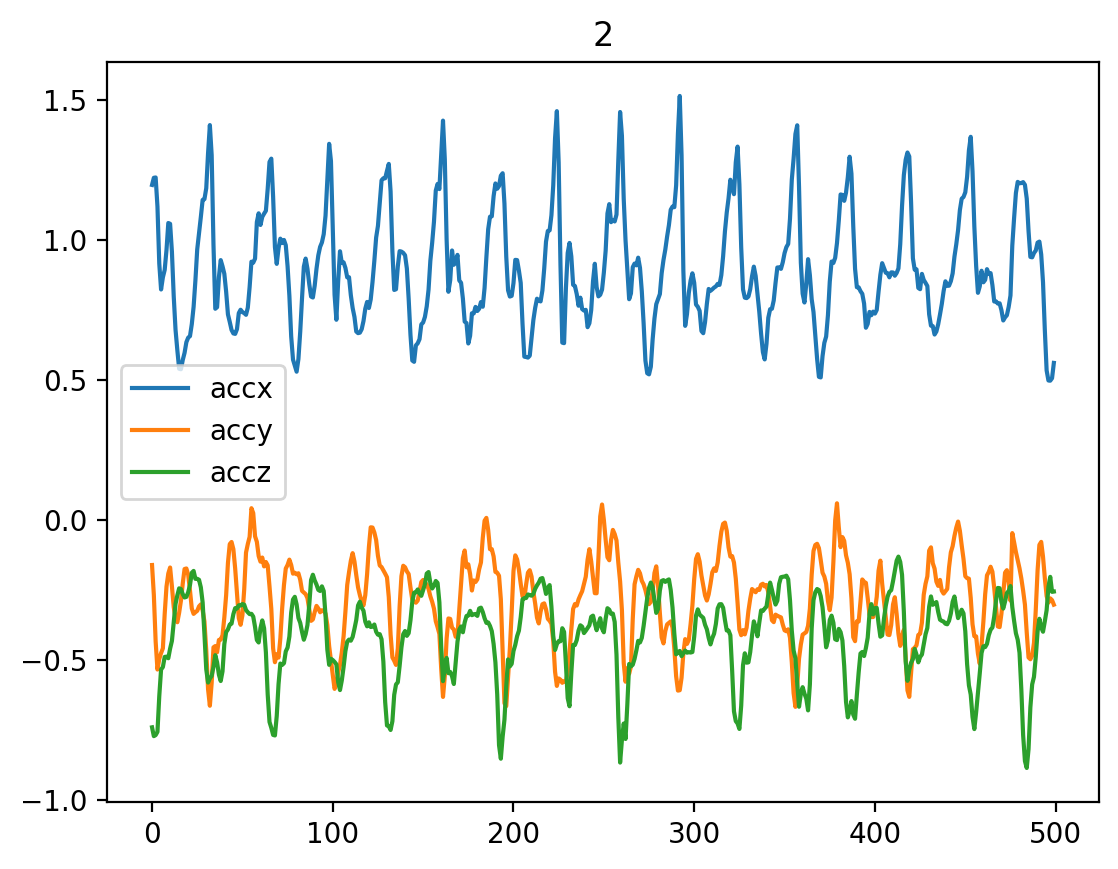

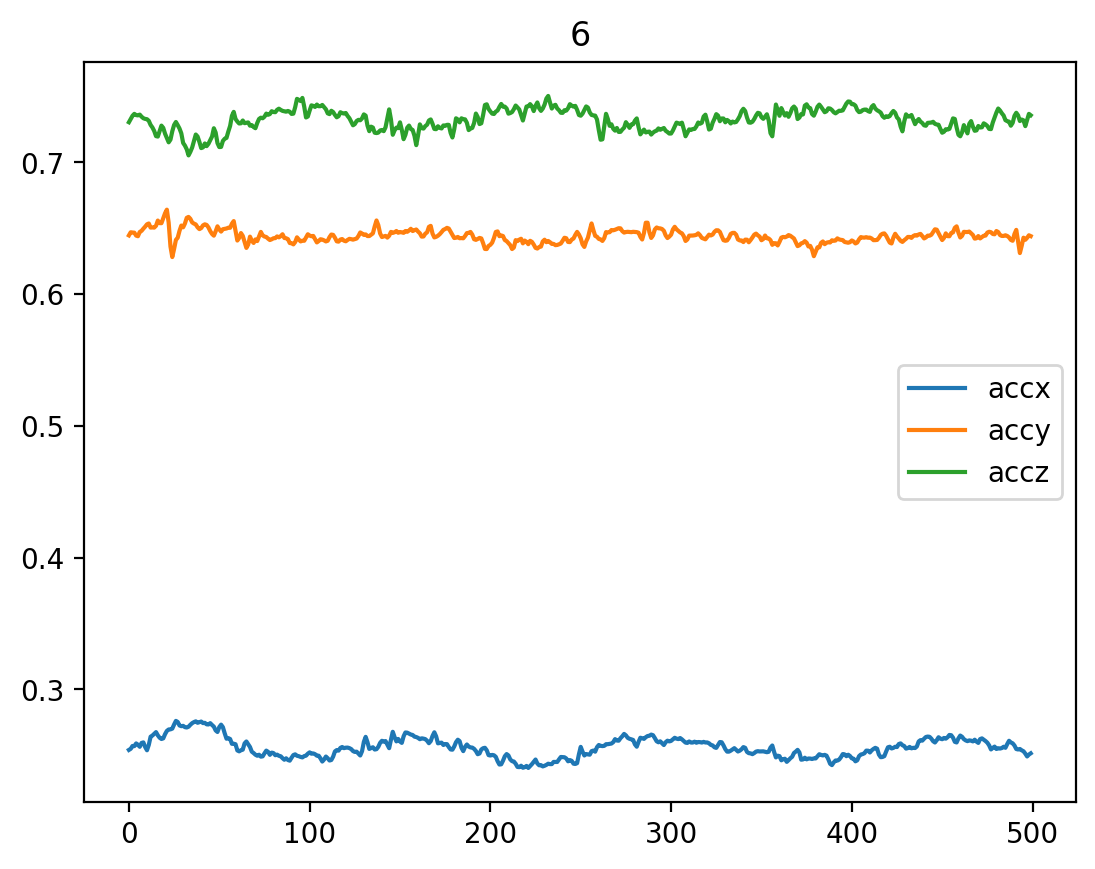

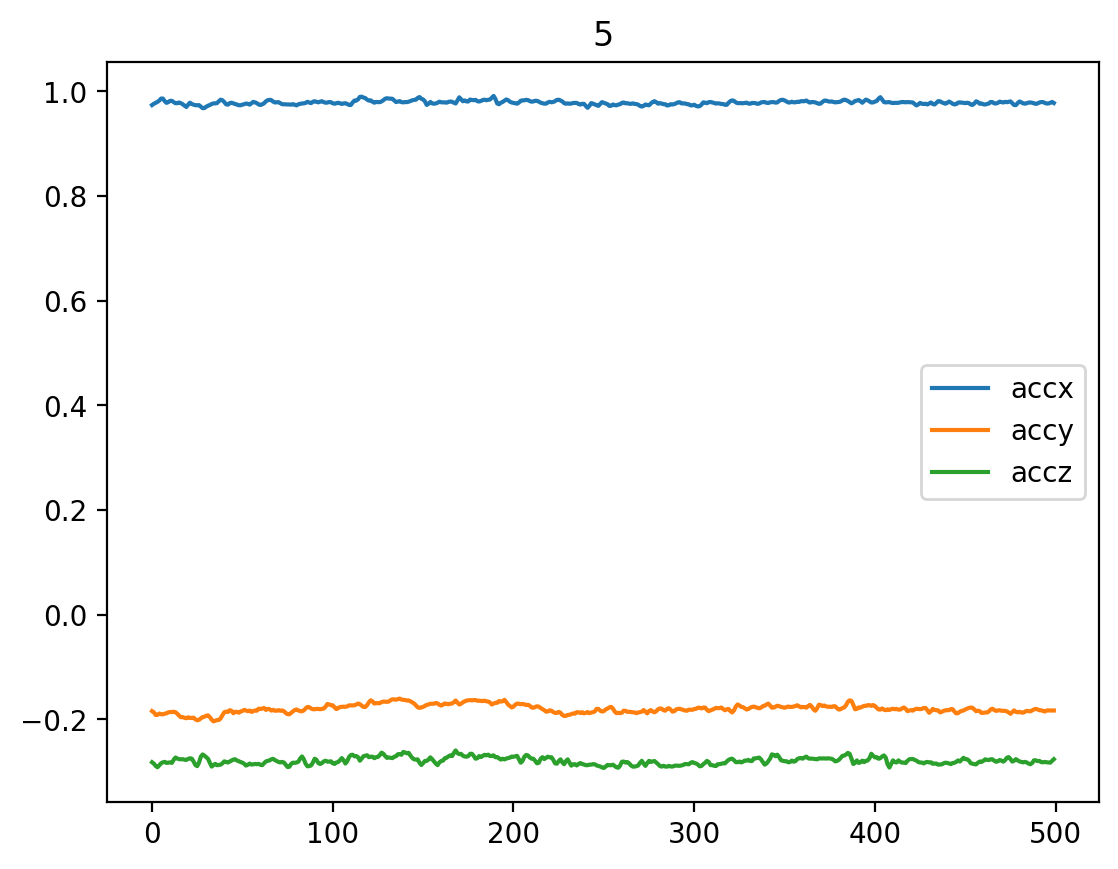

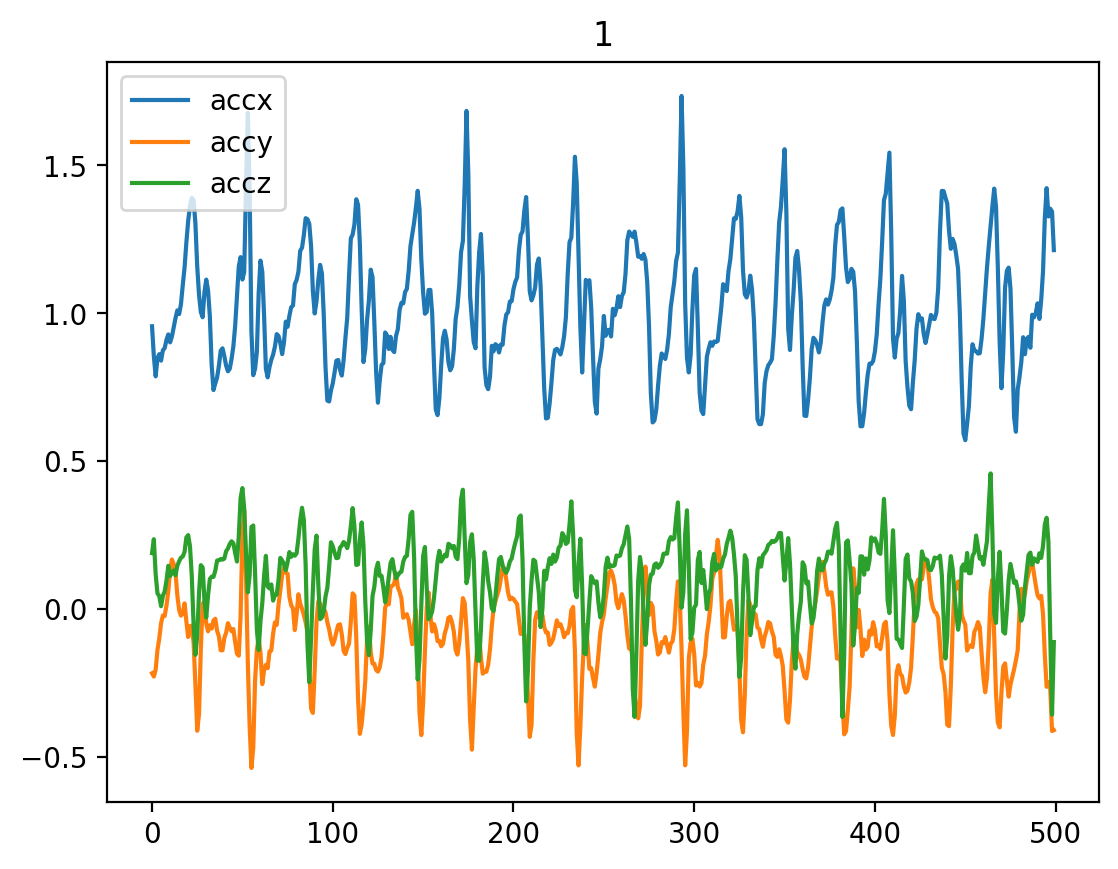

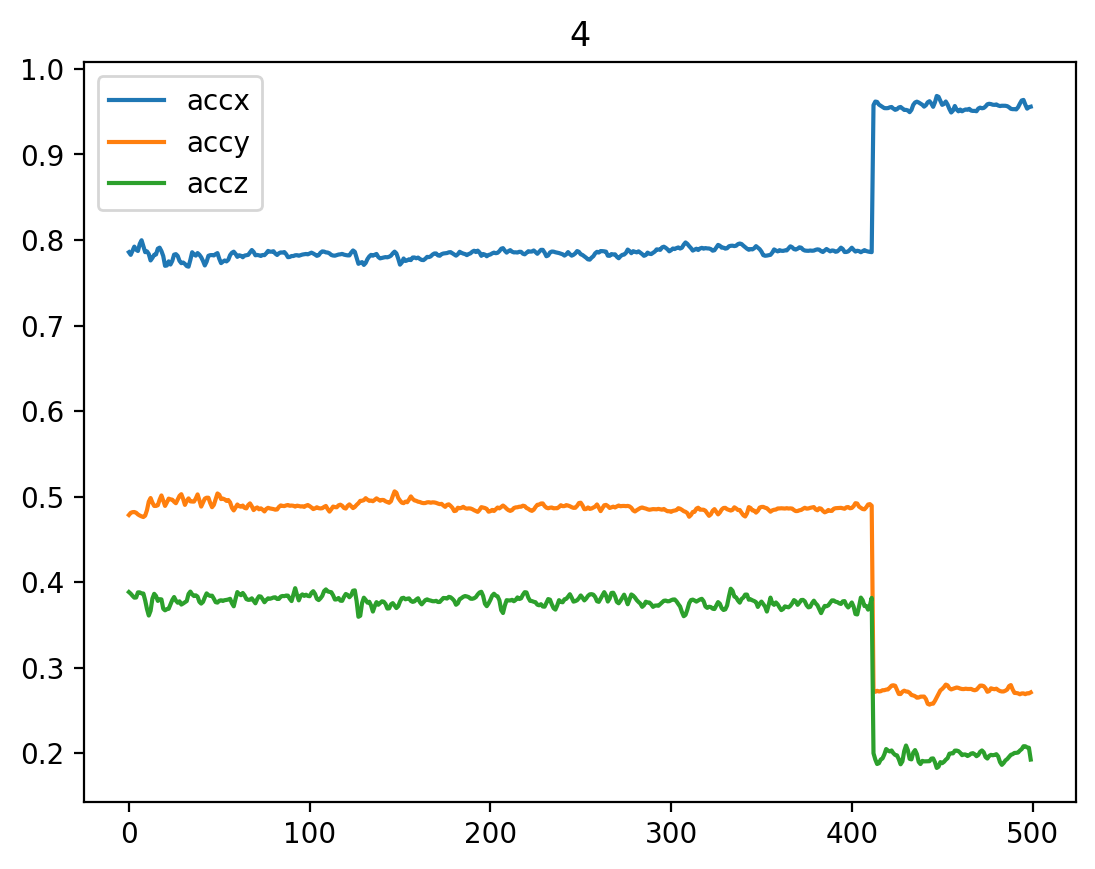

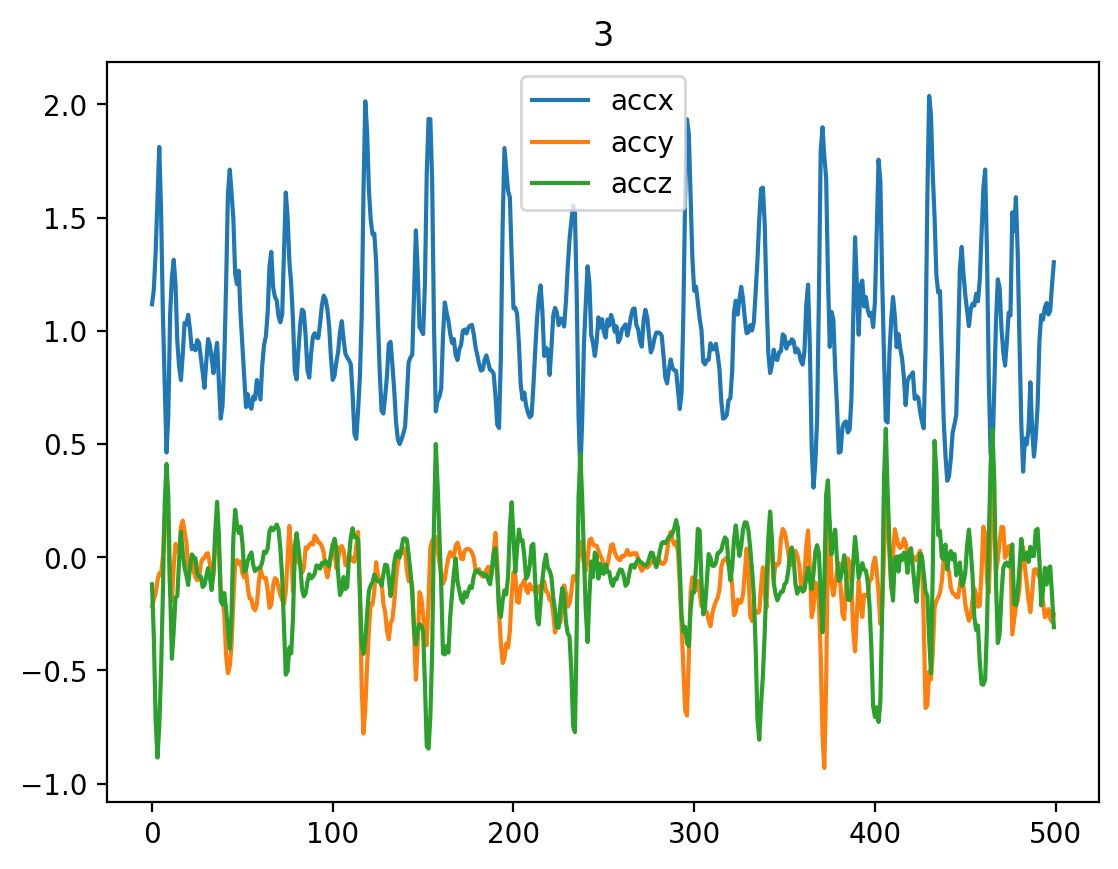

In [10]:
uniqueclass = np.unique(y_train)
d = {}
for i,j in enumerate(y_train):
  if j not in d:
    data = X_train[i]
    plt.plot(data[:,0],label="accx")
    plt.plot(data[:,1],label="accy")
    plt.plot(data[:,2],label="accz")
    plt.title(j)
    plt.legend()
    plt.show()
    d[j] = X_train

# classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

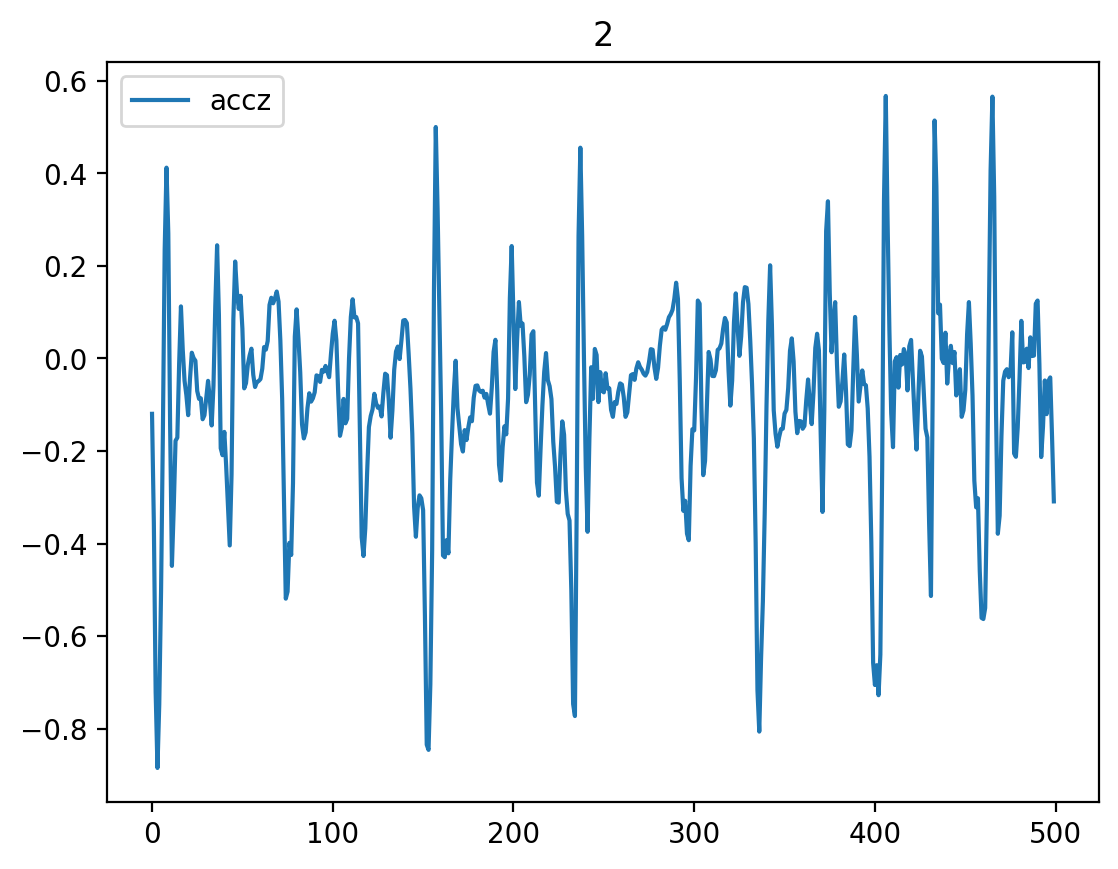

In [11]:
plt.plot(data[:,2],label="accz")
plt.title(j)
plt.legend()
plt.show()
d[j] = X_train

# classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

In [12]:
m = [[],[],[],[],[],[]]
for i,j in enumerate(y_train):
  c = 0
  for g in range(500):
    c += np.sqrt(np.sum(X_train[i][g]**2))
  m[j-1].append(c/500)

for i in range(6):
  print(np.mean(m[i]))


# NO it is clearly evident from linear acc data as dynamic activities have acc >1.04 while static have <1.04.


1.050682400465318
1.0448572017057092
1.0440904944801723
1.0155547656799542
1.0316474049730346
1.0068263079528097


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(np.concatenate((X_train.reshape((-1, 3)), np.repeat(y_train, 500).reshape(-1,1)), axis = 1), columns = ["accx", "accy", "accz", "Label"])
print(df.shape)


(63000, 4)


(126, 2)


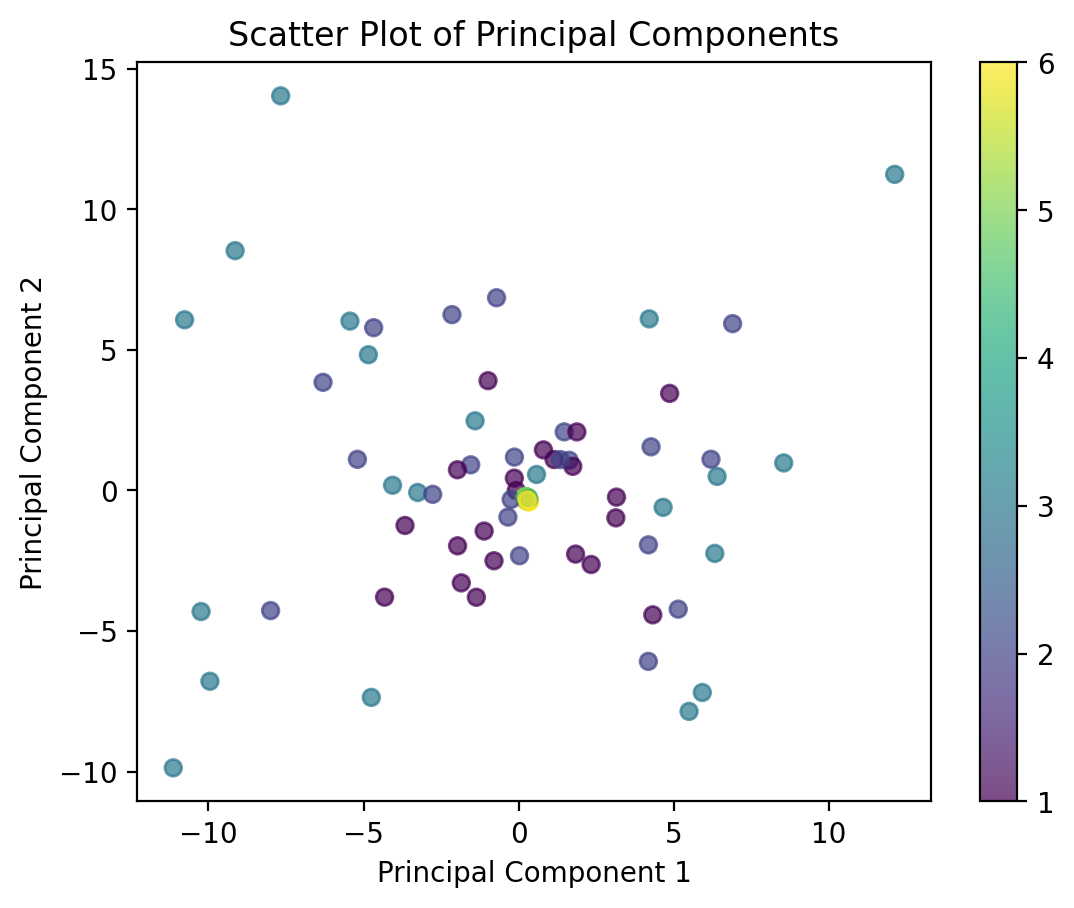

In [14]:
from sklearn.preprocessing import StandardScaler
df["totalacc"] = df["accx"]**2 + df["accy"]**2 + df["accz"]**2
# s = StandardScaler()
# totalaccscaled = s.fit_transform(df["totalacc"]
pca = PCA(n_components=2)
xpca = pca.fit_transform(df["totalacc"].values.reshape(-1,500))
print(xpca.shape)
scatter = plt.scatter(xpca[:, 0],xpca[:, 1],c=y_train,cmap='viridis',alpha=0.7)
# print(xpca.size)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.colorbar(scatter)
plt.show()

*** Feature extraction started ***



*** Feature extraction finished ***
(126, 1152)


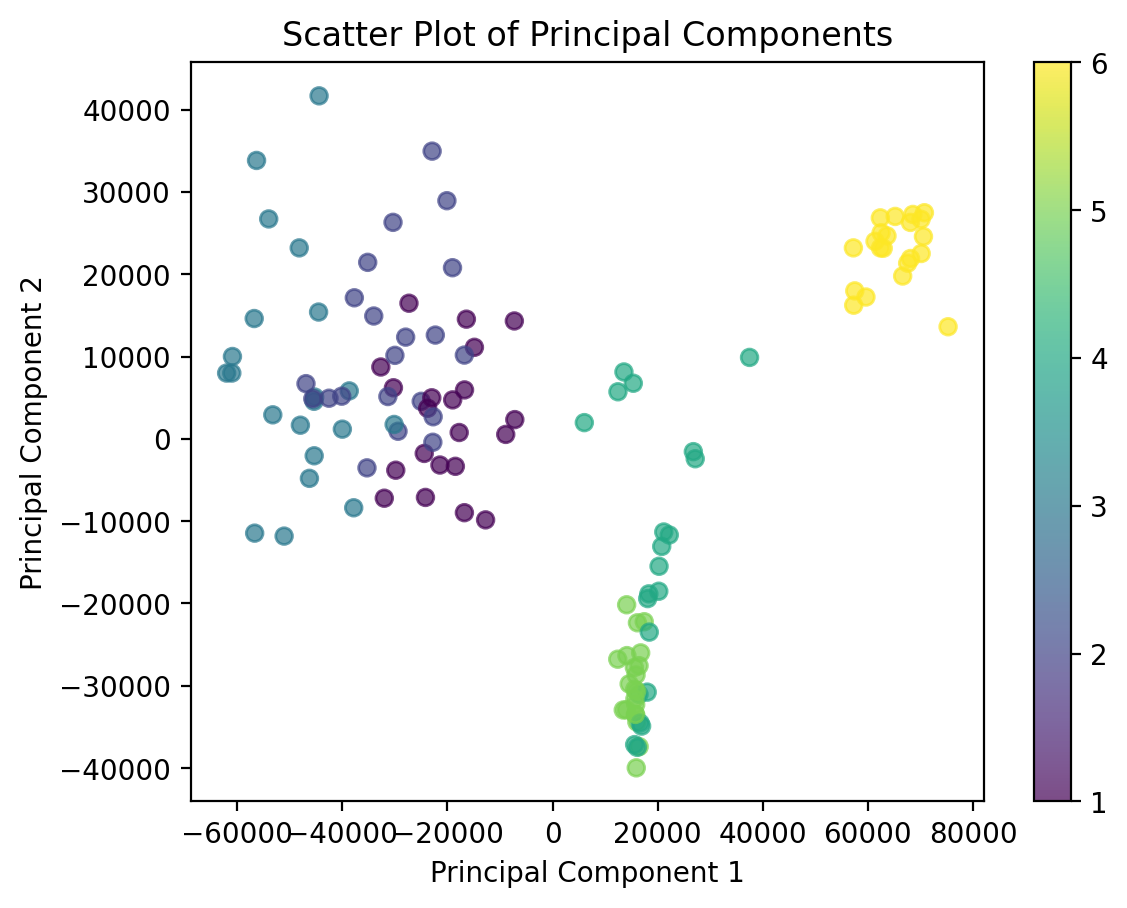

In [15]:
import tsfel

cfg = tsfel.get_features_by_domain()
features = tsfel.time_series_features_extractor(cfg,df[["accx","accy","accz"]], fs=50, window_size=500)

print(features.shape)


xpcatsfel = pca.fit_transform(features)
scattertsfel = plt.scatter(xpcatsfel[:, 0],xpcatsfel[:, 1],c=y_train,cmap='viridis',alpha=0.7)
# print(xpca.size)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.colorbar(scattertsfel)
plt.show()

TSFEL is better than PCA on total acceleration. The different activities are well classified in TSFEL as we can observe while in PCA on total acceleration, we can see kind of random plotting of points with presence of multiple outlier points.

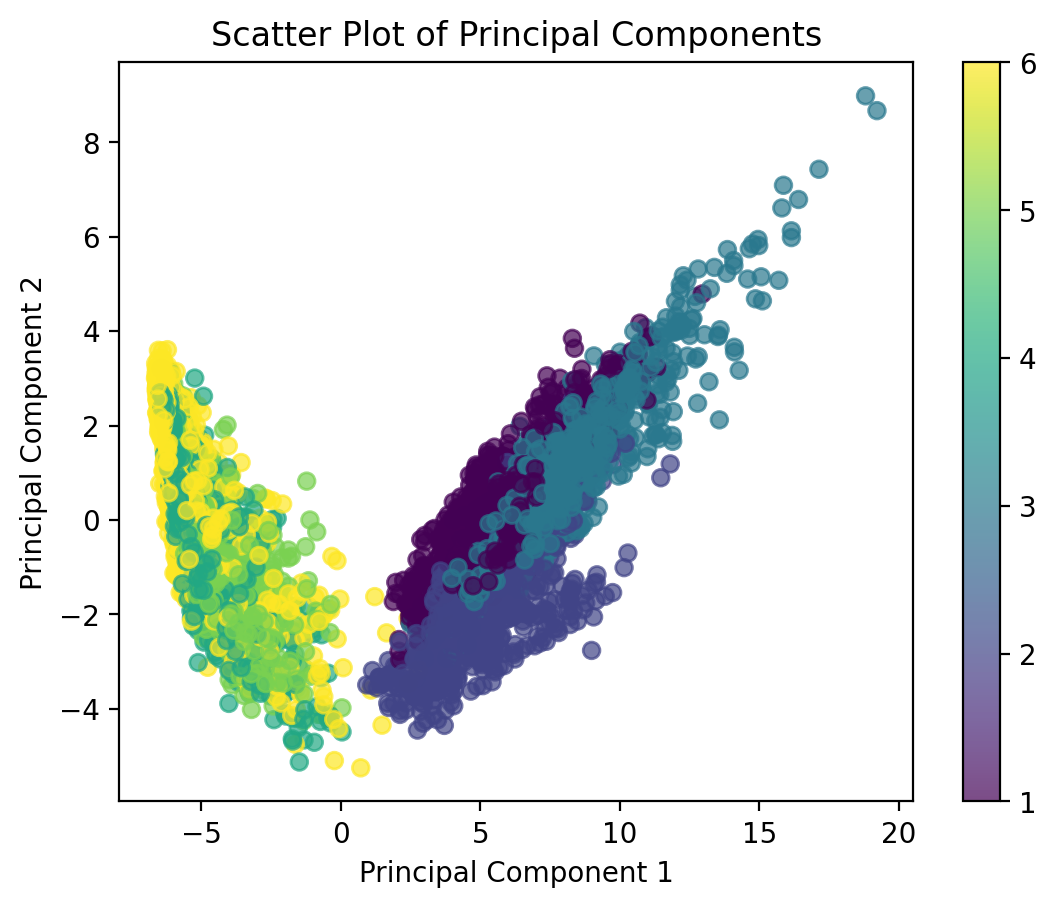

In [26]:
xpcaraw = pca.fit_transform(x)
scatteraw = plt.scatter(xpcaraw[:, 0],xpcaraw[:, 1],c=y,cmap='viridis',alpha=0.7)
# print(xpca.size)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.colorbar(scatteraw)
plt.show()

In [16]:
%%capture
corr = features.corr()
print(corr)

corrd = pd.DataFrame(corr)
conditionhc = corrd > 0.999
conditionredundant = corrd < 0.001



for column in corrd.columns:
    inhc = corrd.index[conditionhc[column]]  #    Get indices where condition is True
    for index in inhc:
        print(f"Feature 1: {column}, Feature 2: {index}")   
print()
print("Redundant Features")
for column in corrd.columns:
    i = corrd.index[conditionredundant[column]]
    for j in i:
        print(f"Feature 1: {column}, Feature 2: {j}") 

0.6481481481481481


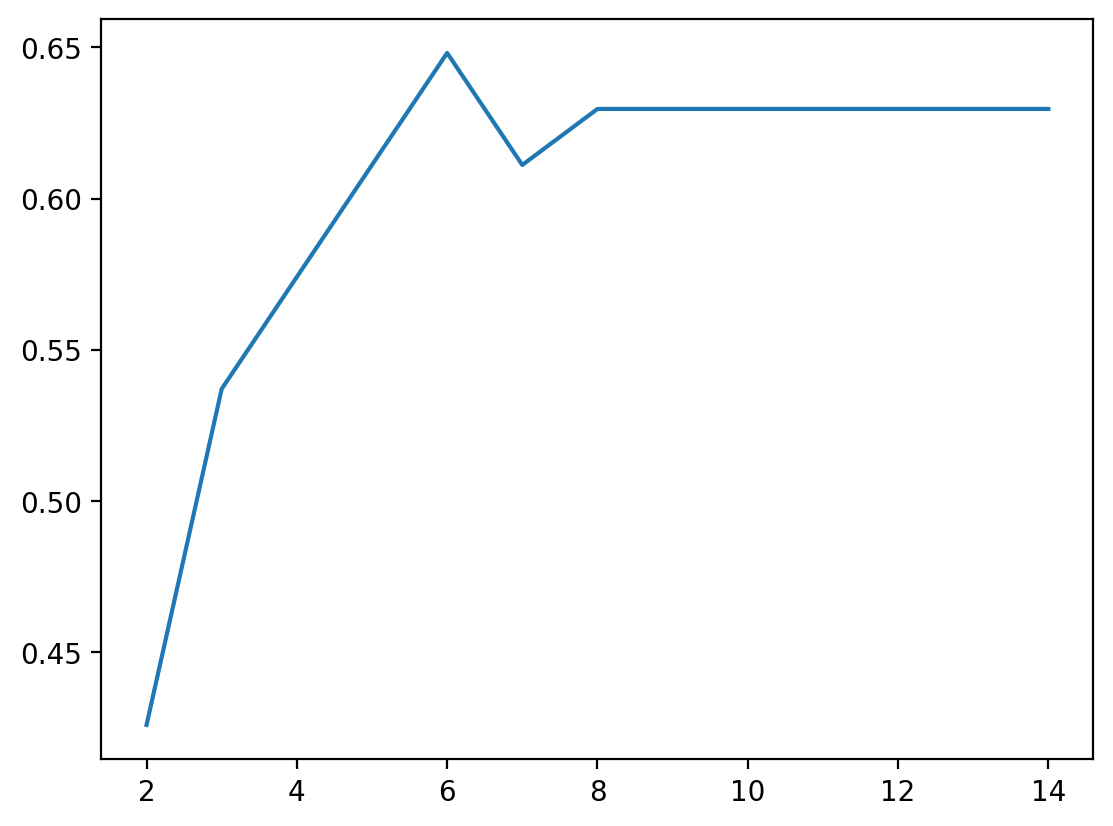

[[4 2 0 3 0 0]
 [2 5 1 0 1 0]
 [5 2 1 1 0 0]
 [0 0 0 8 1 0]
 [1 1 0 0 7 0]
 [0 0 0 0 0 9]]


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
m = []
for i in range(2,15):
    clf = DecisionTreeClassifier(random_state=2,max_depth=i)
    clf.fit(X_train.reshape(-1,1500), y_train)
    y_pred = clf.predict(X_test.reshape(-1,1500))
    m.append(accuracy_score(y_test, y_pred))

print(max(m))
plt.plot(range(2,15),m)
plt.show()
# print(precision_score(y_test, y_pred),average=None)
# print(recall_score(y_test, y_pred),average=None)
print(confusion_matrix(y_test, y_pred))

In [18]:
tf = pd.DataFrame(np.concatenate((X_test.reshape((-1, 3)), np.repeat(y_test, 500).reshape(-1,1)), axis = 1), columns = ["accx", "accy", "accz", "Label"])
features_test = tsfel.time_series_features_extractor(cfg,tf[["accx","accy","accz"]],fs=50,window_size=500)
features_test

*** Feature extraction started ***



*** Feature extraction finished ***


,accx_Absolute energy,accx_Area under the curve,accx_Autocorrelation,accx_Average power,accx_Centroid,accx_ECDF Percentile Count_0,accx_ECDF Percentile Count_1,accx_ECDF Percentile_0,accx_ECDF Percentile_1,accx_ECDF_0,...,accz_Wavelet variance_0,accz_Wavelet variance_1,accz_Wavelet variance_2,accz_Wavelet variance_3,accz_Wavelet variance_4,accz_Wavelet variance_5,accz_Wavelet variance_6,accz_Wavelet variance_7,accz_Wavelet variance_8,accz_Zero crossing rate
0,553.192673,10.010872,5.0,55.430128,4.951279,100.0,400.0,0.742390,1.309660,0.002,...,0.006583,0.020556,0.025592,0.028545,0.034961,0.044262,0.053273,0.059316,0.062127,66.0
1,496.578647,9.702003,3.0,49.757379,4.991823,100.0,400.0,0.776955,1.201567,0.002,...,0.015637,0.059982,0.096619,0.138860,0.180444,0.210190,0.208112,0.173597,0.125093,0.0
2,422.753737,8.726592,4.0,42.360094,4.876947,100.0,400.0,0.647065,1.148603,0.002,...,0.005568,0.035226,0.058800,0.072518,0.094563,0.125884,0.154179,0.169034,0.169699,6.0
3,502.911032,10.008690,3.0,50.391887,4.969185,100.0,400.0,0.997339,1.009725,0.002,...,0.000117,0.000401,0.000796,0.001163,0.001510,0.001943,0.002507,0.003194,0.003989,0.0
4,506.398790,10.043588,3.0,50.741362,4.989130,100.0,400.0,1.003767,1.009321,0.002,...,0.000050,0.000149,0.000291,0.000500,0.000745,0.001022,0.001352,0.001740,0.002174,0.0
5,550.221988,10.122887,4.0,55.132464,4.972272,100.0,400.0,0.742845,1.300388,0.002,...,0.006781,0.018047,0.034495,0.062853,0.102422,0.145287,0.177279,0.190583,0.189286,60.0
6,513.464639,9.943136,4.0,51.449363,4.961689,100.0,400.0,0.818254,1.176702,0.002,...,0.002140,0.005976,0.007330,0.011773,0.021170,0.035370,0.053248,0.073924,0.097001,0.0
7,524.544546,10.222018,2.0,52.559574,4.987353,100.0,400.0,1.022170,1.025731,0.002,...,0.000031,0.000092,0.000159,0.000231,0.000297,0.000361,0.000437,0.000529,0.000630,0.0
8,604.315970,9.931732,4.0,60.552702,5.036513,100.0,400.0,0.601997,1.546456,0.002,...,0.008654,0.034316,0.045905,0.047902,0.049050,0.054841,0.064337,0.075486,0.086735,77.0
9,442.144973,9.186801,5.0,44.303103,4.942232,100.0,400.0,0.740046,1.069223,0.002,...,0.002396,0.013688,0.037687,0.078358,0.127868,0.182657,0.241274,0.295358,0.331612,0.0


0.8888888888888888


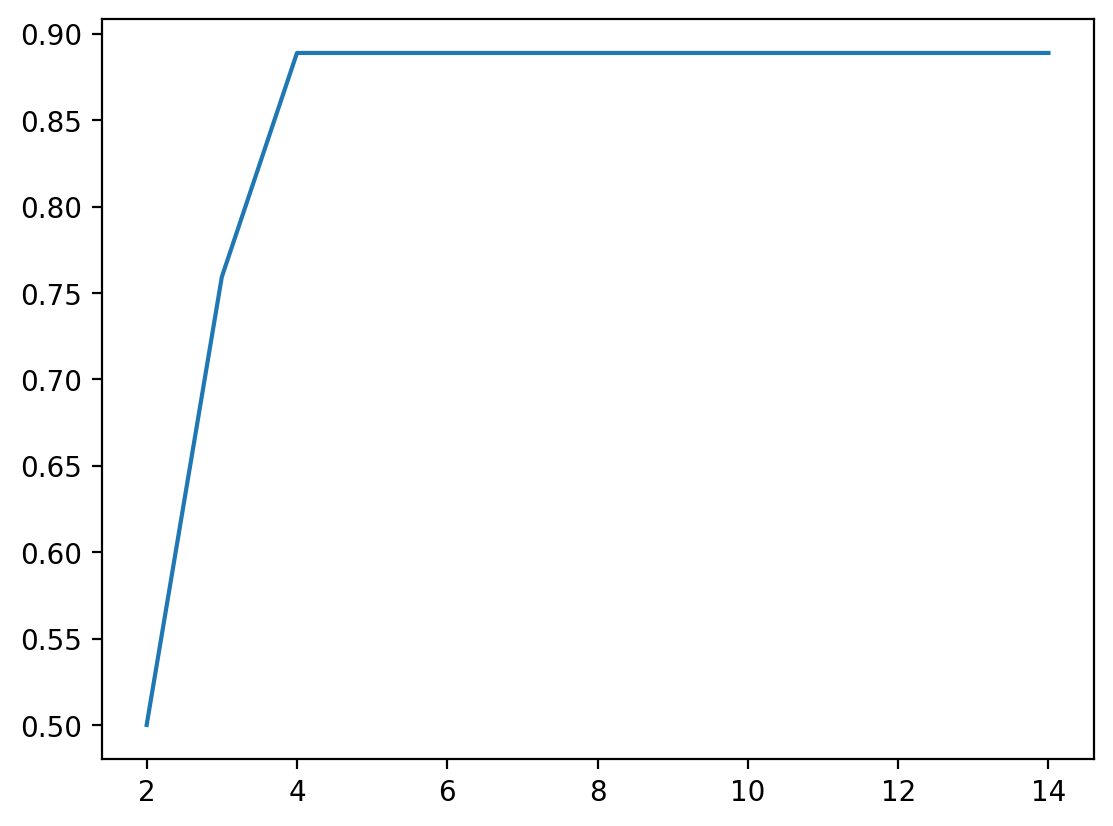

In [42]:
m = []
for i in range(2,15):
    clf = DecisionTreeClassifier(random_state=42,max_depth=i)
    clf.fit(features, y_train)
    y_pred = clf.predict(features_test)
    m.append(accuracy_score(y_test, y_pred))

print(max(m))
plt.plot(range(2,15),m)
plt.show()


0.8700373260943333


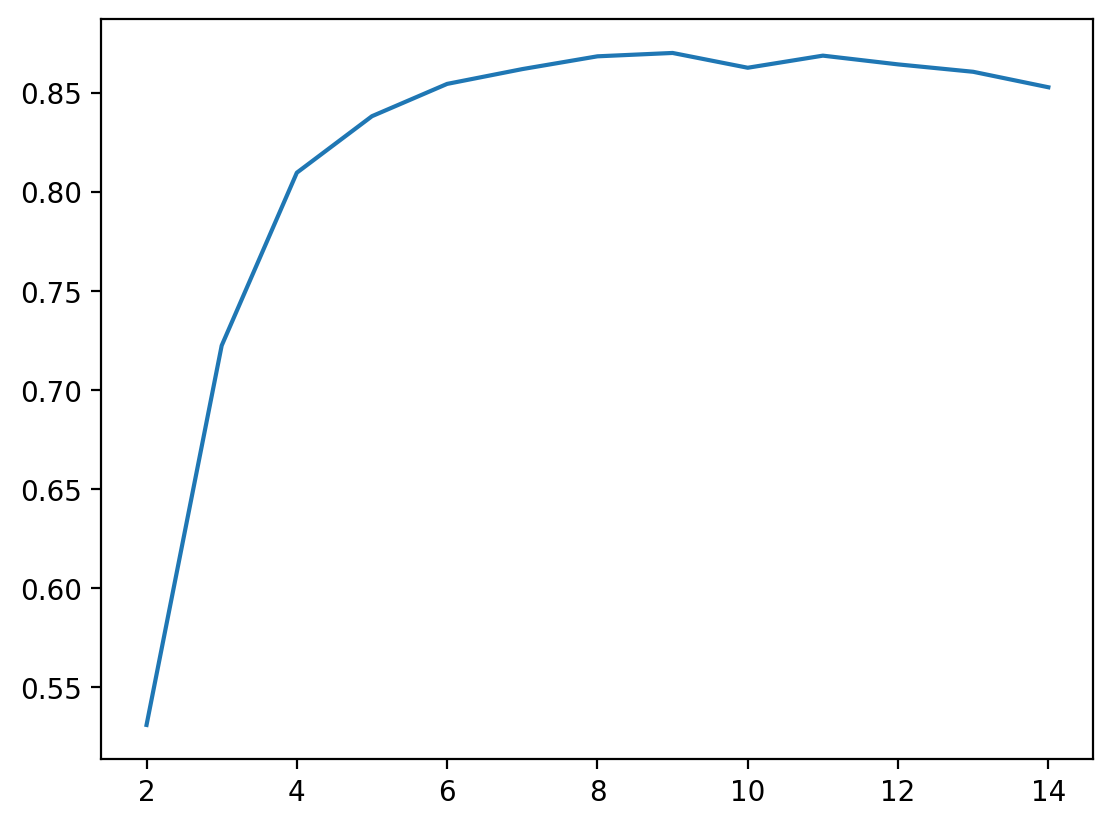

In [43]:
xtest = pd.read_csv(os.path.join(test_path,"X_test.txt"),delim_whitespace=True,header=None)
xtest.columns = featurelist
ytest = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)
m = []
for i in range(2,15):
    clf = DecisionTreeClassifier(random_state=42,max_depth=i)
    clf.fit(x, y)
    raw_pred = clf.predict(xtest)
    m.append(accuracy_score(ytest, raw_pred))

print(max(m))
plt.plot(range(2,15),m)
plt.show()

In [20]:
label6 = tf[tf["Label"] == 4]
print(label6)


           accx      accy      accz  Label
10000  0.978469  0.244871  0.142931    4.0
10001  0.976102  0.244845  0.147366    4.0
10002  0.976887  0.246853  0.137635    4.0
10003  0.979573  0.248658  0.125279    4.0
10004  0.982925  0.250311  0.131478    4.0
...         ...       ...       ...    ...
26995  0.929636  0.192764  0.369441    4.0
26996  0.927869  0.191753  0.369351    4.0
26997  0.926002  0.192286  0.366709    4.0
26998  0.925441  0.192937  0.362487    4.0
26999  0.928037  0.194660  0.370403    4.0

[4500 rows x 4 columns]


In [21]:
from langchain_groq.chat_models import ChatGroq

# Groq API and Models 
Groq_Token = "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"  # Do not share this key with anyone

groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}

In [22]:
# Statement 
testData = tf[["accx","accy","accz"]]
testDataValues = testData.values
d1,d2 = testDataValues.shape
labels = tf["Label"]

sentence = None
tempLabel1 = df[df["Label"] == 1]
dataLabel1 = tempLabel1[["accx","accy","accz"]]

tempLabel2 = df[df["Label"] == 2]
dataLabel2 = tempLabel2[["accx","accy","accz"]]

tempLabel3 = df[df["Label"] == 3]
dataLabel3 = tempLabel3[["accx","accy","accz"]]

tempLabel4 = df[df["Label"] == 4]
dataLabel4 = tempLabel4[["accx","accy","accz"]]

tempLabel5 = df[df["Label"] == 5]
dataLabel5 = tempLabel5[["accx","accy","accz"]]

tempLabel6 = df[df["Label"] == 6]
dataLabel6 = tempLabel6[["accx","accy","accz"]]

# System Prompts 
query = f"""
* You are a model for Human Activity Recognition. 

* Your task is to analyze the accelaration values (where x represents vertical direction and y and z represent horizontal direction) in the given text and classify it as 
    1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'.

* Provide the label and, if necessary, a brief explanation of your reasoning.

Here are few examples:
1. Sentence: '{dataLabel3}'
Label: 3.0 (WALKING_DOWNSTAIRS)

2. Sentence: '{dataLabel1}'
Label: 1.0 (WALKING)

3. Sentence: '{dataLabel2}'
Label: 2.0 (WALKING_UPSTAIRS)

4. Sentence: '{dataLabel6}'
Label: 6.0 (LAYING)

5. Sentence: '{dataLabel5}'
Label: 5.0 (STANDING)

6. Sentence: '{dataLabel4}'
Label: 4.0 (SITTING)
the following lines will contain an array containing the acceleration values in the x, y, and z directions.
""" 

# To use Groq LLMs 
model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

for i in range(10):
    searchIndex = np.random.randint(0,d1)
    searchSentence = testDataValues[searchIndex]
    searchLabel = labels[searchIndex]
    llm.invoke('Predict the label according to the given data')
    answer = llm.invoke(str(searchSentence))
    print(answer.content, "| Actual Label: ", searchLabel)



It looks like you've provided a list of three numbers. Is there something specific you'd like to do with these numbers or would you like me to help you understand what they might represent? | Actual Label:  1.0
It looks like you've provided a numerical vector with three elements!

Here's a breakdown of the vector:

* The first element is approximately 0.8851711
* The second element is approximately 0.03734008
* The third element is approximately -0.02971975

Is there something specific you'd like to do with this vector, or would you like me to help with something related to it? | Actual Label:  3.0
It looks like you've provided a list of three numbers:

1. 1.003832
2. -0.2567099
3. 0.08677867

Is there something specific you'd like to do with these numbers, or would you like me to help with something in particular? | Actual Label:  5.0
It looks like you've provided a list of three numbers:

1. 0.02868974
2. 0.8940814
3. 0.453109

Is there something specific you'd like to do with these 

In [23]:
# Step 1: Train the Model Once
model_name = "llama3-70b"  # Assuming this is a pre-trained model
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)

# Step 2: Define a Function for Prediction
def predict_activity(acc_data):
    """
    This function takes acceleration data and predicts the activity label using the pre-trained model.
    """
    query = f"""
    * You are a model for Human Activity Recognition.

    * Your task is to analyze the acceleration values (where x represents vertical direction and y and z represent horizontal direction) in the given text and classify it as 
        1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'.
    Here are few examples:
        1. Sentence: '{dataLabel3}'
        Label: 3.0 (WALKING_DOWNSTAIRS)

        2. Sentence: '{dataLabel1}'
        Label: 1.0 (WALKING)

        3. Sentence: '{dataLabel2}'
        Label: 2.0 (WALKING_UPSTAIRS)

        4. Sentence: '{dataLabel6}'
        Label: 6.0 (LAYING)

        5. Sentence: '{dataLabel5}'
        Label: 5.0 (STANDING)

        6. Sentence: '{dataLabel4}'
        Label: 4.0 (SITTING)

    Here is the acceleration data: {acc_data}
    Do not give any explanation
    """

    # Invoke the model with the query
    answer = llm.invoke(query)
    return answer.content

# Step 3: Process Multiple Queries
for i in range(10):
    searchIndex = np.random.randint(0, d1)  # Randomly select an index
    searchSentence = testDataValues[searchIndex]  # Get the corresponding acceleration data
    searchLabel = labels[searchIndex]  # Get the actual label

    # Predict the label
    predicted_label = predict_activity(str(searchSentence))

    # Print the result
    print(f"Predicted Label: {predicted_label} | Actual Label: {searchLabel}")


Predicted Label: 5.0 (STANDING) | Actual Label: 3.0
Predicted Label: 5.0 (STANDING) | Actual Label: 3.0
Predicted Label: Based on the given acceleration data, I classify it as:

1.0 (WALKING) | Actual Label: 5.0
Predicted Label: 5.0 (STANDING) | Actual Label: 4.0
Predicted Label: 1.0 (WALKING) | Actual Label: 2.0
Predicted Label: 5.0 (STANDING) | Actual Label: 1.0
Predicted Label: 5.0 (STANDING) | Actual Label: 5.0
Predicted Label: 5.0 (STANDING) | Actual Label: 5.0
Predicted Label: Based on the given acceleration data, I classify it as:

5.0 (STANDING) | Actual Label: 6.0
Predicted Label: 5.0 (STANDING) | Actual Label: 6.0
